# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [37]:
#Importando as bibliotecas necessarias
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

from sklearn.metrics import r2_score

In [38]:
#Importando o pacote tips
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [50]:
#Criando as colunas tip_pct e net_bill
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [40]:
#Modelo de regressão tip por net_bill
reg_tip = smf.ols('tip ~ net_bill', data=tips).fit()
reg_tip.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Tue, 11 Jun 2024   Prob (F-statistic):           5.02e-23
Time:                        20:13:22   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0.0, 10.5)

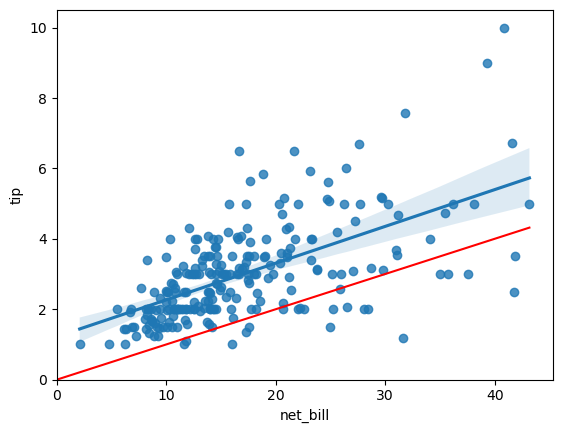

In [41]:
#Gráfico de dispersão
sns.regplot(y='tip', x='net_bill', data=tips[tips['tip_pct']<.5])

#Gerando dados para a linha dos 10%
x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

#Plotando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 10%')

#Opções estéticas
plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [51]:
#Modelo de regressão tip_pct por net_bill
reg_tip_pct = smf.ols('tip_pct ~ net_bill', data=tips).fit()
reg_tip_pct.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Tue, 11 Jun 2024   Prob (F-statistic):           1.52e-06
Time:                        20:18:44   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0.0, 45.419122087626874)

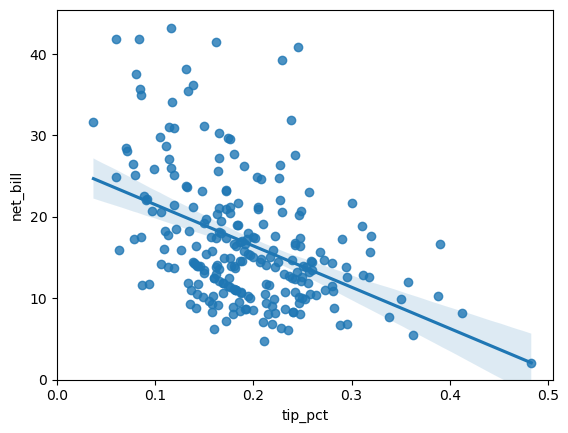

In [43]:
#Gráfico de dispersão
sns.regplot(x='tip_pct', y='net_bill', data=tips[tips['tip_pct']<.5])

#Opções estéticas
plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

In [52]:
#Correlação entre as váriaveis
tips[['tip', 'tip_pct', 'net_bill']].corr()

,tip,tip_pct,net_bill
tip,1.000000,0.241572,0.576663
tip_pct,0.241572,1.000000,-0.302144
net_bill,0.576663,-0.302144,1.000000


Visualizando o gráfico fica notório que o 'tip ~ net_bill' é um gráfico crescente e o 'tip_pct ~ net_bill' é um gráfico decrescente.

Já olhando a correlação percebemos que ela é superior quando se trata do valor da conta com o valor de gorjeta

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [53]:
#Valor preditivo para tip_pct
pred_tip_pct = reg_tip.fittedvalues
pred_tip_pct

0      2.918050
1      2.192915
2      3.070031
3      3.354125
4      3.414719
         ...   
239    3.626300
240    3.831920
241    3.383925
242    2.926990
243    2.898184
Length: 244, dtype: float64

In [54]:
#Valor preditivo para tip com tip_pct * net_bill
pred_tip = pred_tip_pct * tips['net_bill'].values
pred_tip

0      46.630446
1      19.034500
2      53.756242
3      68.323532
4      71.640801
         ...    
239    83.803782
240    96.487751
241    69.945737
242    47.036737
243    45.733339
Length: 244, dtype: float64

In [55]:
#r2 do modelo para tip
r2 = r2_score(tips['tip'].values, pred_tip)
r2

-2563.263877729572

In [56]:
#Comparando o r2 com o primeiro modelo
r2 = r2_score(pred_tip, pred_tip_pct)
r2

-1.358927961781188